In [2]:
from __future__ import division
from __future__ import print_function
from sklearn.ensemble import IsolationForest

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import pandas as pd
import numpy as np
from numpy import percentile
from sklearn.metrics import average_precision_score
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [3]:
# Define the number of inliers and outliers
n_samples = 256
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

In [4]:
random_state = np.random.RandomState(42)
# Define nine outlier detection tools to be compared
classifiers = {
    'Isolation Forest': IsolationForest(contamination=outliers_fraction,
                                random_state=random_state)
}

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea7c2ae9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea7c2aefa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea7c2ae6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea7c2ce520>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea7c235280>],
 'means': []}

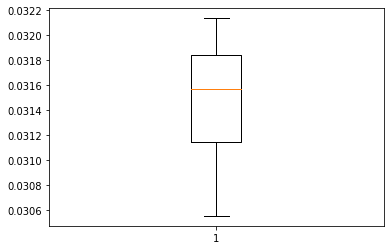

In [5]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    #X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    #X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    #X = np.r_[X1, X2]
    # Add outliers
    #X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    data = scipy.io.loadmat('C:\\Users\\anton\\OneDrive\\Skrivbord\\Thesis_Code\\IsolationForestTinyML\\DatSets\\glass.mat',
                        squeeze_me=False)

    enlist = list(data.items())
    X = np.array(enlist, dtype=object)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 1)

    y_true = np.empty([1,0], dtype=int)

    #print(X[1][0][0])
    k = 0
    while k < len(X[1][0]):
        y_true = np.append(y_true, int(X[1][0][k]))
        k += 1

    X = X[0][0]
    # Fit the model
    #plt.figure(figsize=(15, 12))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        #print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        p = 0
        aps = []
        while p < 10:
            clf.fit(X)
            #WARNING put +1
            scores_pred = clf.decision_function(X) * 1 
            threshold = percentile(scores_pred, 100 * outliers_fraction)
            y_pred = clf.predict(X) * -1
            y_pred = (y_pred + 1) / 2
            aps.append(average_precision_score(y_true, scores_pred))
            p += 1
        #n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points
        #WARNING +1
        #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * 1
        #Z = Z.reshape(xx.shape)
        #plt.figure(figsize=[10,10])
        #subplot = plt.subplot(2, 2, 1)
        #subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
        #                 cmap=plt.cm.Blues_r)
        #a = subplot.contour(xx, yy, Z, levels=[-threshold],
        #                    linewidths=2, colors='red')
        #subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
        #                 colors='orange')
        #b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
        #                    s=20, edgecolor='k')
        #c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
        #                    s=20, edgecolor='k')
        #subplot.axis('tight')
        #subplot.legend(
         #   [a.collections[0], b, c],
        #    ['learned decision function', 'true inliers', 'true outliers'],
          #  prop=matplotlib.font_manager.FontProperties(size=10),
          #  loc='lower right')
        #subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        #subplot.set_xlim((-7, 7))
        #subplot.set_ylim((-7, 7))
    #plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    #plt.suptitle("Outlier detection")
#plt.show()
plt.boxplot(aps)

In [6]:

clf.estimators_[0].tree_.children_left

array([  1,   2,   3,   4,   5,   6,   7,  -1,   9,  -1,  -1,  -1,  13,
        14,  15,  -1,  -1,  18,  -1,  -1,  21,  22,  -1,  -1,  25,  -1,
        -1,  -1,  29,  -1,  31,  32,  33,  -1,  35,  -1,  -1,  -1,  -1,
        40,  41,  42,  43,  44,  -1,  -1,  47,  48,  -1,  -1,  -1,  52,
        53,  54,  -1,  -1,  -1,  58,  59,  -1,  -1,  62,  -1,  -1,  65,
        66,  67,  68,  -1,  -1,  -1,  72,  -1,  -1,  -1,  76,  77,  78,
        79,  -1,  -1,  -1,  -1,  84,  -1,  -1,  87,  88,  89,  90,  -1,
        92,  -1,  -1,  95,  -1,  -1,  -1,  99, 100, 101, 102, 103,  -1,
        -1,  -1,  -1, 108, 109,  -1, 111,  -1,  -1,  -1, 115, 116,  -1,
        -1,  -1], dtype=int64)

In [7]:

clf.estimators_[0].tree_.children_right

array([ 86,  39,  28,  27,  12,  11,   8,  -1,  10,  -1,  -1,  -1,  20,
        17,  16,  -1,  -1,  19,  -1,  -1,  24,  23,  -1,  -1,  26,  -1,
        -1,  -1,  30,  -1,  38,  37,  34,  -1,  36,  -1,  -1,  -1,  -1,
        75,  64,  51,  46,  45,  -1,  -1,  50,  49,  -1,  -1,  -1,  57,
        56,  55,  -1,  -1,  -1,  61,  60,  -1,  -1,  63,  -1,  -1,  74,
        71,  70,  69,  -1,  -1,  -1,  73,  -1,  -1,  -1,  83,  82,  81,
        80,  -1,  -1,  -1,  -1,  85,  -1,  -1,  98,  97,  94,  91,  -1,
        93,  -1,  -1,  96,  -1,  -1,  -1, 114, 107, 106, 105, 104,  -1,
        -1,  -1,  -1, 113, 110,  -1, 112,  -1,  -1,  -1, 118, 117,  -1,
        -1,  -1], dtype=int64)

In [8]:
clf.estimators_[0].tree_.feature

array([ 0,  1,  4,  7,  0,  8,  6, -2,  1, -2, -2, -2,  1,  6,  0, -2, -2,
        5, -2, -2,  2,  5, -2, -2,  3, -2, -2, -2,  5, -2,  1,  4,  3, -2,
        4, -2, -2, -2, -2,  2,  7,  7,  0,  2, -2, -2,  1,  3, -2, -2, -2,
        0,  6,  1, -2, -2, -2,  7,  4, -2, -2,  7, -2, -2,  0,  8,  5,  0,
       -2, -2, -2,  7, -2, -2, -2,  5,  1,  6,  2, -2, -2, -2, -2,  6, -2,
       -2,  1,  7,  5,  3, -2,  6, -2, -2,  5, -2, -2, -2,  8,  5,  3,  1,
        0, -2, -2, -2, -2,  7,  4, -2,  5, -2, -2, -2,  6,  5, -2, -2, -2],
      dtype=int64)

In [9]:
clf.estimators_[0].tree_.threshold

array([ 1.52226780e+00,  1.42282154e+01,  7.35341460e+01,  1.42469424e+00,
        1.51493759e+00,  7.94574656e-02,  6.51512883e+00, -2.00000000e+00,
        1.30126171e+01, -2.00000000e+00, -2.00000000e+00, -2.00000000e+00,
        1.31224510e+01,  7.99868095e+00,  1.51638615e+00, -2.00000000e+00,
       -2.00000000e+00,  5.19201129e-01, -2.00000000e+00, -2.00000000e+00,
        1.11723017e+00,  3.71867178e-01, -2.00000000e+00, -2.00000000e+00,
        1.10118046e+00, -2.00000000e+00, -2.00000000e+00, -2.00000000e+00,
        7.46102384e-03, -2.00000000e+00,  1.28447649e+01,  7.44586015e+01,
        8.54927204e-01, -2.00000000e+00,  7.36923663e+01, -2.00000000e+00,
       -2.00000000e+00, -2.00000000e+00, -2.00000000e+00,  2.77784223e+00,
        8.36239722e-01,  2.00137054e-01,  1.51428191e+00,  9.75817125e-01,
       -2.00000000e+00, -2.00000000e+00,  1.48197388e+01,  9.64381048e-01,
       -2.00000000e+00, -2.00000000e+00, -2.00000000e+00,  1.51606623e+00,
        8.95411902e+00,  

In [10]:
clf.estimators_[0].tree_.n_node_samples

array([214, 197, 167, 160, 159,   4,   3,   1,   2,   1,   1,   1, 155,
        68,   7,   5,   2,  61,   7,  54,  87,   8,   7,   1,  79,  13,
        66,   1,   7,   1,   6,   5,   4,   1,   3,   1,   2,   1,   1,
        30,  24,  14,   6,   2,   1,   1,   4,   3,   1,   2,   1,   8,
         4,   3,   2,   1,   1,   4,   2,   1,   1,   2,   1,   1,  10,
         9,   7,   6,   5,   1,   1,   2,   1,   1,   1,   6,   4,   3,
         2,   1,   1,   1,   1,   2,   1,   1,  17,   6,   5,   3,   1,
         2,   1,   1,   2,   1,   1,   1,  11,   8,   4,   3,   2,   1,
         1,   1,   1,   4,   3,   1,   2,   1,   1,   1,   3,   2,   1,
         1,   1], dtype=int64)

In [11]:
print(len(clf.estimators_[0].tree_.feature))

119


In [16]:
file = open("tree_attributes", "w")
c = 0
while c < len(clf.estimators_[0].tree_.feature):
    file.write("," + str(clf.estimators_[0].tree_.feature[c]))
    c += 1
    